# TicTacToe Data Set Classifier - Tournament Model

In [1]:
from TicTacToe import load_tic_tac_toe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import GeneticProgram as gp

### Import Iris Data Set

In [3]:
# Data set
X, y = load_tic_tac_toe()

# Split dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=True, test_size=0.20)

### Display callback

In [4]:
def tournamentDisplayCallback(string):
    clear_output(wait=True)
    display(string)

### Tournament Selection
Run three training sessions and take the best performer based on accuracy on the *training set*.
Re-do this for three different mutation rates and compare the best performers.

In [5]:
# Number of experiments to run per mutation rate
num_runs = 5

#### Mutation Rate = 0.05

In [6]:
template_program = gp.Program(
     max_initial_instructions = 64,
     num_registers            = 8,
     num_inputs               = 4,
     mutation_rate            = 0.05,
     max_num_instructions     = 1024,
     num_classes              = 2
)

In [7]:
programs_05       = []
history_05        = []
best_accuracy_05  = 0.0
best_performer_05 = None
for i in range(num_runs):
    p, h = gp.tournamentSelection(population_size    = 16,
                                 template_program    = template_program,
                                 halting_fitness     = 200.0,
                                 max_num_generations = 2000,
                                 X                   = train_X,
                                 y                   = train_y,
                                 display_fun         = tournamentDisplayCallback)
    
    train_acc = p.accuracy(train_X, train_y)
    test_acc  = p.accuracy(test_X, test_y)
    
    h['train_acc'] = train_acc
    h['test_acc']  = test_acc
    
    programs_05.append(p)
    history_05.append(h)
    
    if train_acc > best_accuracy_05 or best_performer_05 == None:
        best_accuracy_05  = train_acc
        best_performer_05 = i

'Round 1999 - Error 452.3668247254143'

In [8]:
history_05[best_performer_05]['train_acc']

0.6879895561357703

In [9]:
history_05[best_performer_05]['test_acc']

0.6302083333333334

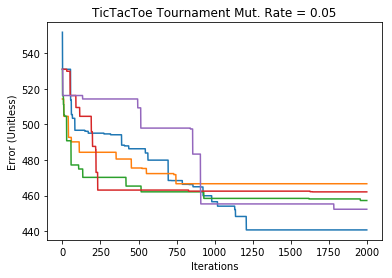

In [23]:
for i in range(num_runs):
    error = history_05[i]['error']
    plt.plot(error)
plt.xlabel("Iterations")
plt.ylabel("Error (Unitless)")
plt.title("TicTacToe Tournament Mut. Rate = 0.05")
plt.show()

#### Mutation Rate = 0.1

In [11]:
template_program = gp.Program(
     max_initial_instructions = 64,
     num_registers            = 8,
     num_inputs               = 4,
     mutation_rate            = 0.1,
     max_num_instructions     = 1024,
     num_classes              = 2
)

In [12]:
programs_10       = []
history_10        = []
best_accuracy_10  = 0.0
best_performer_10 = None
for i in range(num_runs):
    p, h = gp.tournamentSelection(population_size    = 16,
                                 template_program    = template_program,
                                 halting_fitness     = 200.0,
                                 max_num_generations = 2000,
                                 X                   = train_X,
                                 y                   = train_y,
                                 display_fun         = tournamentDisplayCallback)
    
    train_acc = p.accuracy(train_X, train_y)
    test_acc  = p.accuracy(test_X, test_y)
    
    h['train_acc'] = train_acc
    h['test_acc']  = test_acc
    
    programs_10.append(p)
    history_10.append(h)
    
    if train_acc > best_accuracy_10 or best_performer_10 == None:
        best_accuracy_10  = train_acc
        best_performer_10 = i

'Round 1999 - Error 457.09761237254986'

In [13]:
history_10[best_performer_10]['train_acc']

0.7114882506527415

In [14]:
history_10[best_performer_10]['test_acc']

0.6927083333333334

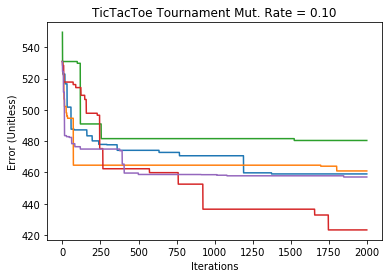

In [24]:
for i in range(num_runs):
    error = history_10[i]['error']
    plt.plot(error)
plt.xlabel("Iterations")
plt.ylabel("Error (Unitless)")
plt.title("TicTacToe Tournament Mut. Rate = 0.10")
plt.show()

### Compare Mutation Rates and Convergence

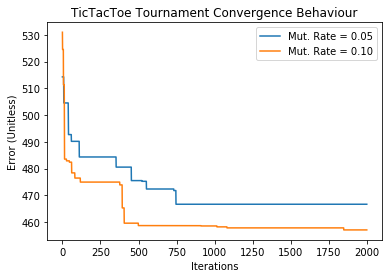

In [25]:
error_05 = history_05[best_performer_05]['error']
error_10 = history_10[best_performer_10]['error']

plt.plot(error_05)
plt.plot(error_10)
plt.xlabel("Iterations")
plt.ylabel("Error (Unitless)")
plt.legend([
    'Mut. Rate = 0.05',
    'Mut. Rate = 0.10'
])
plt.title("TicTacToe Tournament Convergence Behaviour")
plt.show()